Notebook by Zara

## **EDA**

1. Variability check
2. KNN for checking number of anchors

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import os
import cv2

##### **1. Loading and inspecting the dataset**

In [2]:
data = pd.read_excel('annotations.xlsx')

In [3]:
# Remove the 'Link' column from the dataset
data.drop('Link', axis=1, inplace=True)

In [4]:
data

Brand            Image  Xmin  Xmax  Ymin  Ymax
0     ABN AMRO  19466380_01.JPG  1538  1869    11    94
1     ABN AMRO      1805578.JPG   907  1229    30   127
2     ABN AMRO      1814076.JPG  2382  3101  4365  4573
3     ABN AMRO      1814606.JPG   919  1224    31   121
4     ABN AMRO      1814797.JPG  2991  3102   392   506
...        ...              ...   ...   ...   ...   ...
1339   WEHKAMP      1822839.JPG   856  1558  2883  3065
1340   WEHKAMP  19264730_01.JPG   454  1267  2545  2876
1341    ZEEMAN  18610010_01.JPG  1177  1993  3765  3962
1342    ZEEMAN      1827765.JPG   716  1304  2395  2642
1343    ZEEMAN  19107040_01.JPG   721  1490  2792  3042

[1344 rows x 6 columns]

In [5]:
folder_path = "images"

##### **2. Basic statistics and summary**

In [6]:
# Check the summary statistics of numeric columns
print(data.describe())

# Check the data types of columns
print(data.dtypes)


              Xmin         Xmax          Ymin          Ymax
count  1344.000000  1344.000000   1344.000000   1344.000000
mean   1326.704613  1975.084821   1815.627976   2151.453869
std    1080.071499  1114.659261   1639.509934   1975.946835
min       5.000000   153.000000      1.000000     79.000000
25%     423.000000  1129.500000    193.750000    711.250000
50%    1121.000000  1863.000000   1791.500000   2115.000000
75%    1975.000000  2692.750000   2863.000000   3130.500000
max    6080.000000  6459.000000  27787.000000  43889.000000
Brand    object
Image    object
Xmin      int64
Xmax      int64
Ymin      int64
Ymax      int64
dtype: object


In [7]:
# Check the number of unique classes (e.g., "ABN AMRO", "RED BULL")
unique_brands = data['Brand'].nunique()
print("Number of unique classes:", unique_brands)

Number of unique classes: 96


In [8]:
# Get all unique brand names (classes) from the 'Class' column
unique_brands = data['Brand'].unique()

# Sort the unique brand names alphabetically
unique_brands_sorted = sorted(unique_brands)

# Print all unique brand names
print("Unique Brand Names:")
for brand in unique_brands_sorted:
    print(brand)

# Alternatively, write unique brand names to a text file
output_file = "unique_brand_names.txt"
with open(output_file, 'w') as f:
    for brand in unique_brands_sorted:
        f.write(brand + '\n')

print(f"Unique brand names written to: {output_file}")

Unique Brand Names:
ABN AMRO
AFAS
AFFLIGEM
ALBERT HEIJN
AMSLOD
AMSTEL
ANWB
APPELSIENTJE
ASN
BATAVUS
BAUHAUS
BAVARIA
BEYOND MEAT
BIJENKORF
BIRRA MORETTI
BOOKING.COM
BRAND
BRISTOL
C&A
CHANEL
CHOCOMEL
CHRISTINE LE DUC
COCA-COLA
CORENDON
DE VEGETARISCHE SLAGER
DIOR
ENECO
ESSENT
EXACT
EYE WISH
EYELOVE
FANTA
FIRST CHOICE
GAMMA
GARDEN GOURMET
GAZELLE
GIANT
GROLSCH
HANS ANDERS
HARIBO
HEINEKEN
HEMA
HENNES&MAURITZ
HERTOG JAN
HORNBACH
HUBO
HUGO BOSS
HUNKEMOLLER
ICI PARIS
IKEA
ING BANK
KARWEI
KLM
KLUSWIJS
KRUIDVAT
LANDAL
LEFFE
LIPTON
LIVERA
MARIE JO
MENTOS
MILKA
NIVEA
OMODA
OREO
PERONI
PRAXIS
RABOBANK
RED BAND
RED BULL
REGIOBANK
RITUALS
ROYAL CLUB
SCAPINO
SHOEBY
SNS
SPA
SPECSAVERS
SPRITE
STELLA
SUNWEB
TOOLSTATION
TREK
TRIODOS BANK
TUI
UNOX
VALESS
VAN HAREN
VATTENFALL
VENCO
VISMA
VIVERA
WARSTEINER
WEHKAMP
YVES SAINT LAURENT
ZEEMAN
Unique brand names written to: unique_brand_names.txt


##### **3. Visualizing data distribution**

``Class distribution``

Looking at different papers with a similar research as this, a normal distribution should be around 10 images per logo.

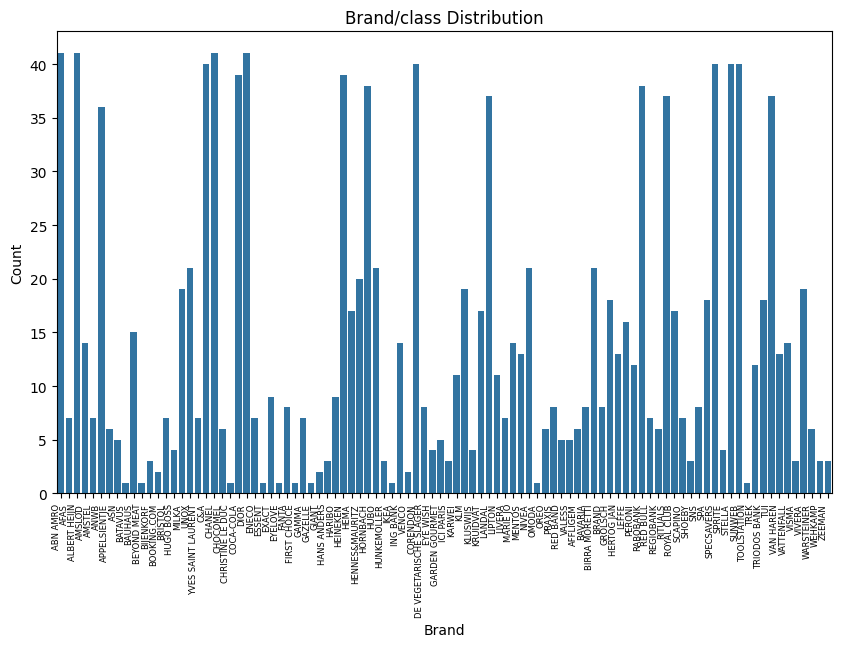

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=data)
plt.title("Brand/class Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")

# Rotate the x-axis labels (class names) by 45 degrees to the right and decrease font size
plt.xticks(rotation=90, ha='right', fontsize=6)  # Adjust the fontsize as needed

plt.show()

``Bounding box analysis: size and shapes``

In [10]:
import os
from PIL import Image
import pandas as pd

# Function to calculate aspect ratio
def calculate_aspect_ratio(xmin, xmax, ymin, ymax):
    width = xmax - xmin
    height = ymax - ymin
    aspect_ratio = width / height
    return aspect_ratio

# List to store aspect ratios
aspect_ratios = []

# Process each row in the dataset
for index, row in data.iterrows():
    image_path = os.path.join(folder_path, row['Image'])
    xmin = row['Xmin']
    xmax = row['Xmax']
    ymin = row['Ymin']
    ymax = row['Ymax']

    # Load image and calculate aspect ratio
    img = Image.open(image_path)
    aspect_ratio = calculate_aspect_ratio(xmin, xmax, ymin, ymax)
    aspect_ratios.append(aspect_ratio)

# Analyze aspect ratio distribution
aspect_ratio_series = pd.Series(aspect_ratios)
aspect_ratio_counts = aspect_ratio_series.value_counts()

# Display aspect ratio distribution
print("Aspect Ratio Distribution:")
print(aspect_ratio_counts)


Aspect Ratio Distribution:
3.969582    25
0.890909    10
0.913223    10
0.861685     9
1.000000     6
            ..
1.829457     1
1.364103     1
1.448020     1
0.491732     1
3.076000     1
Name: count, Length: 1267, dtype: int64


In [11]:
# Display the chosen anchor ratios
print("Chosen Anchor Ratios:")
for i, ratio in enumerate(aspect_ratio_counts):
    print(f"Anchor {i + 1} Ratio:", ratio)

Chosen Anchor Ratios:
Anchor 1 Ratio: 25
Anchor 2 Ratio: 10
Anchor 3 Ratio: 10
Anchor 4 Ratio: 9
Anchor 5 Ratio: 6
Anchor 6 Ratio: 2
Anchor 7 Ratio: 2
Anchor 8 Ratio: 2
Anchor 9 Ratio: 2
Anchor 10 Ratio: 2
Anchor 11 Ratio: 2
Anchor 12 Ratio: 2
Anchor 13 Ratio: 2
Anchor 14 Ratio: 2
Anchor 15 Ratio: 2
Anchor 16 Ratio: 2
Anchor 17 Ratio: 2
Anchor 18 Ratio: 2
Anchor 19 Ratio: 2
Anchor 20 Ratio: 2
Anchor 21 Ratio: 2
Anchor 22 Ratio: 2
Anchor 23 Ratio: 2
Anchor 24 Ratio: 2
Anchor 25 Ratio: 2
Anchor 26 Ratio: 2
Anchor 27 Ratio: 2
Anchor 28 Ratio: 1
Anchor 29 Ratio: 1
Anchor 30 Ratio: 1
Anchor 31 Ratio: 1
Anchor 32 Ratio: 1
Anchor 33 Ratio: 1
Anchor 34 Ratio: 1
Anchor 35 Ratio: 1
Anchor 36 Ratio: 1
Anchor 37 Ratio: 1
Anchor 38 Ratio: 1
Anchor 39 Ratio: 1
Anchor 40 Ratio: 1
Anchor 41 Ratio: 1
Anchor 42 Ratio: 1
Anchor 43 Ratio: 1
Anchor 44 Ratio: 1
Anchor 45 Ratio: 1
Anchor 46 Ratio: 1
Anchor 47 Ratio: 1
Anchor 48 Ratio: 1
Anchor 49 Ratio: 1
Anchor 50 Ratio: 1
Anchor 51 Ratio: 1
Anchor 52 Ratio

##### **4. Image analysis**

Read and load all images and check if bounding boxes coordiantes are correct

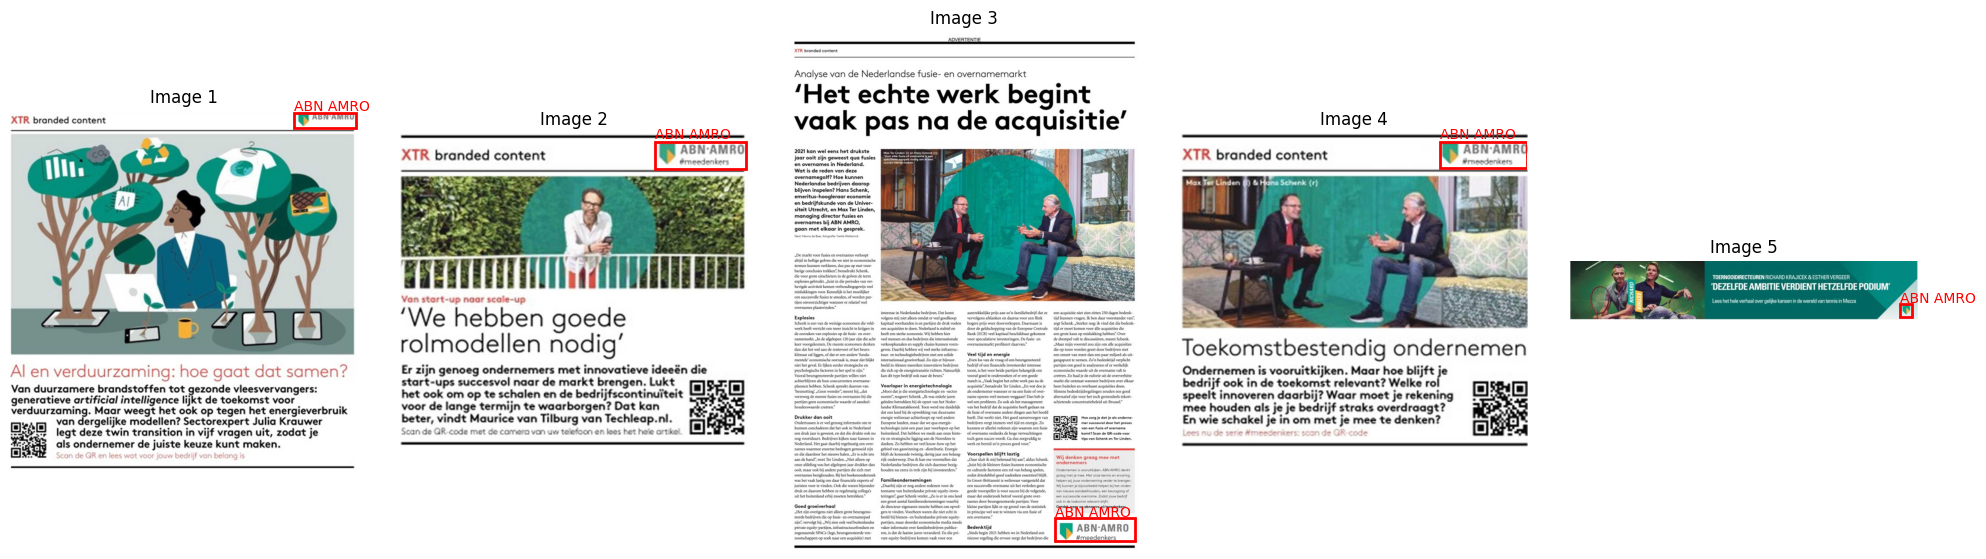

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load and display sample images
sample_image_paths = data['Image'].head(5)  # Get paths of first 5 images for example

plt.figure(figsize=(20, 8))

for i, relative_path in enumerate(sample_image_paths):
    # Construct absolute path to the image file
    absolute_path = os.path.join(folder_path, relative_path)
    
    # Check if the image file exists
    if os.path.exists(absolute_path):
        img = Image.open(absolute_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')
        
        # Retrieve bounding box coordinates and class label (assumed from DataFrame columns)
        xmin = data.loc[i, 'Xmin']
        xmax = data.loc[i, 'Xmax']
        ymin = data.loc[i, 'Ymin']
        ymax = data.loc[i, 'Ymax']
        class_label = data.loc[i, 'Brand']
        
        # Draw bounding box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                           linewidth=2, edgecolor='r', facecolor='none'))
        
        # Display class label
        plt.text(xmin, ymin - 10, class_label, fontsize=10, color='r')
    
    else:
        print(f"Image not found: {absolute_path}")

plt.tight_layout()
plt.show()


Per brand

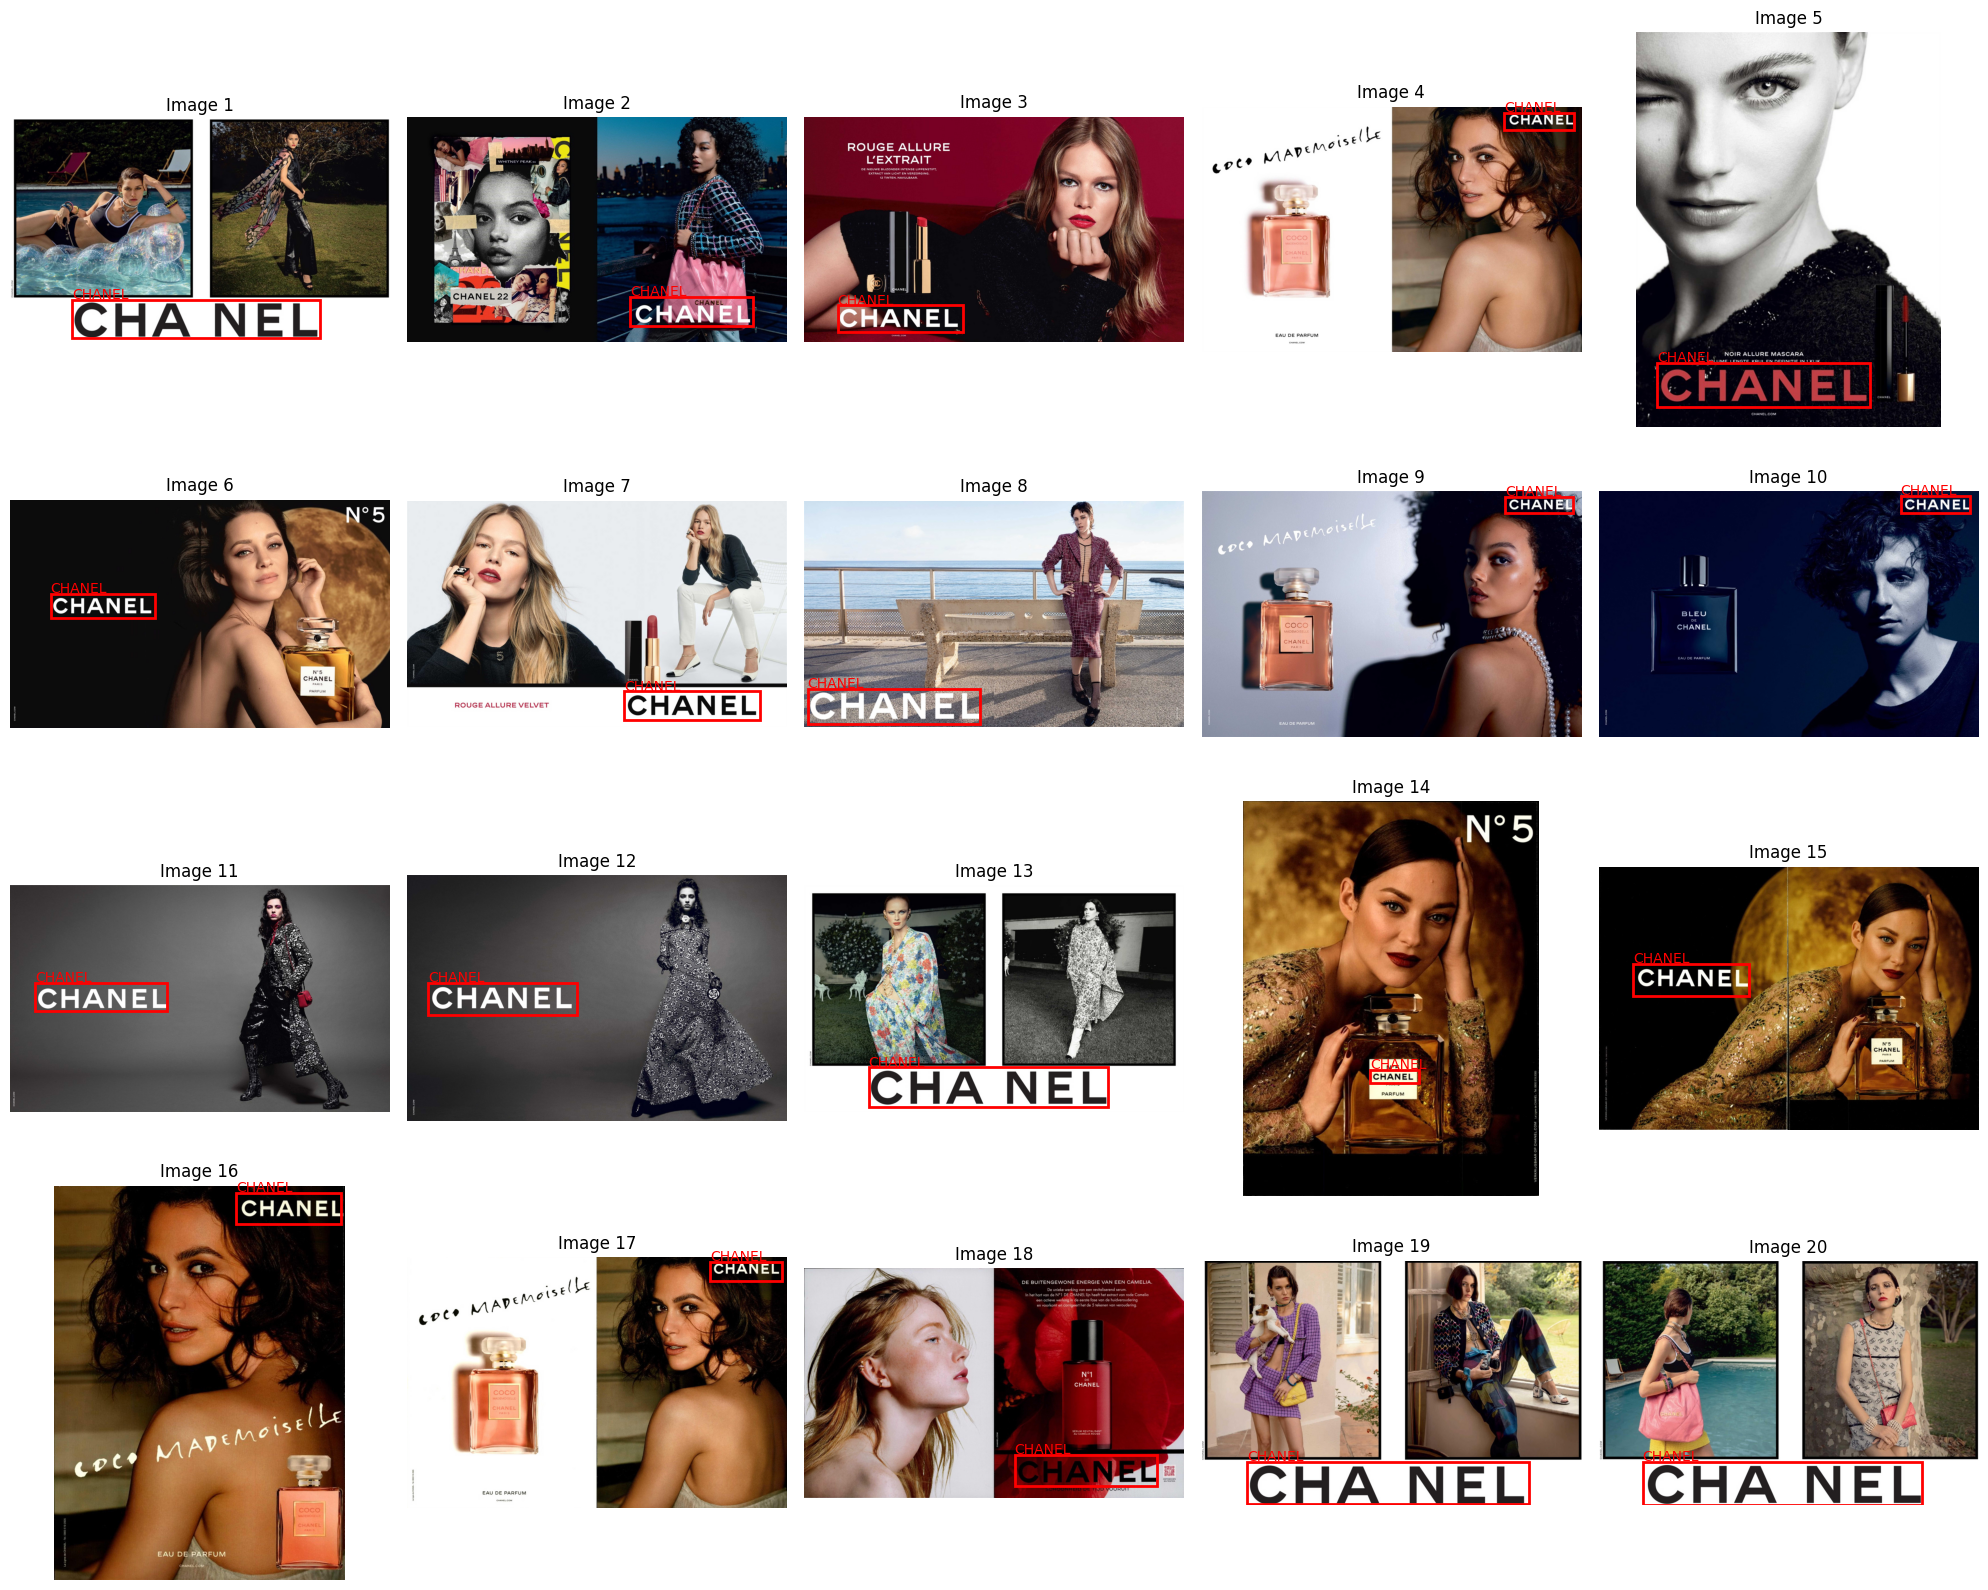

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Filter images corresponding to the brand "Albert Heijn"
brand_name = 'CHANEL'
brand_image_paths = data[data['Brand'] == brand_name]['Image'].head(20)  # Get paths of first 20 images

plt.figure(figsize=(20, 16))  # Adjust figure size for better display

for i, relative_path in enumerate(brand_image_paths):
    # Construct absolute path to the image file
    absolute_path = os.path.join(folder_path, relative_path)
    
    # Check if the image file exists
    if os.path.exists(absolute_path):
        img = Image.open(absolute_path)
        plt.subplot(4, 5, i + 1)  # Display images in a grid (4 rows, 5 columns)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')
        
        # Retrieve bounding box coordinates and class label (assumed from DataFrame columns)
        xmin = data.loc[data['Image'] == relative_path, 'Xmin'].values[0]
        xmax = data.loc[data['Image'] == relative_path, 'Xmax'].values[0]
        ymin = data.loc[data['Image'] == relative_path, 'Ymin'].values[0]
        ymax = data.loc[data['Image'] == relative_path, 'Ymax'].values[0]
        class_label = brand_name
        
        # Draw bounding box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                           linewidth=2, edgecolor='r', facecolor='none'))
        
        # Display class label
        plt.text(xmin, ymin - 10, class_label, fontsize=10, color='r')
    
    else:
        print(f"Image not found: {absolute_path}")

plt.tight_layout()
plt.show()


In [14]:
# from PIL import Image
# import matplotlib.pyplot as plt
# import os
# import ipywidgets as widgets
# from IPython.display import display

# # Base folder path where images are located
# base_folder = "images"

# # Function to display sample images with bounding boxes and class annotations
# def display_sample_images(start_index, num_images):
#     plt.figure(figsize=(20, 8))
    
#     for i in range(num_images):
#         index = start_index + i
        
#         if index >= len(data):
#             break
        
#         # Retrieve image information from the dataset
#         relative_path = data.loc[index, 'Image']
#         xmin = data.loc[index, 'Xmin']
#         xmax = data.loc[index, 'Xmax']
#         ymin = data.loc[index, 'Ymin']
#         ymax = data.loc[index, 'Ymax']
#         class_label = data.loc[index, 'Brand']
        
#         # Construct absolute path to the image file
#         absolute_path = os.path.join(base_folder, relative_path)
        
#         # Check if the image file exists
#         if os.path.exists(absolute_path):
#             img = Image.open(absolute_path)
#             plt.subplot(1, num_images, i + 1)
#             plt.imshow(img)
#             plt.title(f"Image {index + 1}\n{class_label}")
#             plt.axis('off')
            
#             # Draw bounding box
#             plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
#                                                linewidth=2, edgecolor='r', facecolor='none'))
            
#             # Display class label
#             plt.text(xmin, ymin - 10, class_label, fontsize=10, color='r')
        
#         else:
#             print(f"Image not found: {absolute_path}")
    
#     plt.tight_layout()
#     plt.show()

# # Create interactive widgets for controlling image display
# start_index_slider = widgets.IntSlider(min=0, max=len(data) - 1, step=5, description='Start Index:')
# num_images_slider = widgets.IntSlider(min=1, max=10, step=1, value=5, description='Number of Images:')

# # Define a function to update the displayed images based on widget values
# def update_displayed_images(change):
#     start_index = start_index_slider.value
#     num_images = num_images_slider.value
#     display_sample_images(start_index, num_images)

# # Attach the update function to widget events
# start_index_slider.observe(update_displayed_images, 'value')
# num_images_slider.observe(update_displayed_images, 'value')

# # Display interactive widgets and initial images
# display(start_index_slider, num_images_slider)
# update_displayed_images(None)  # Initialize with default values



##### **5. Preperation for training Faster R-CNN and YOLO**

``Number of classes``

In [15]:
unique_brands = data['Brand'].unique()
brand_to_class = {brand: idx for idx, brand in enumerate(unique_brands)}

# Assign class labels based on the mapping
data['Class'] = data['Brand'].map(brand_to_class)

# Display the first few rows of the updated dataset to verify the 'Class' column
print(data)

         Brand            Image  Xmin  Xmax  Ymin  Ymax  Class
0     ABN AMRO  19466380_01.JPG  1538  1869    11    94      0
1     ABN AMRO      1805578.JPG   907  1229    30   127      0
2     ABN AMRO      1814076.JPG  2382  3101  4365  4573      0
3     ABN AMRO      1814606.JPG   919  1224    31   121      0
4     ABN AMRO      1814797.JPG  2991  3102   392   506      0
...        ...              ...   ...   ...   ...   ...    ...
1339   WEHKAMP      1822839.JPG   856  1558  2883  3065     94
1340   WEHKAMP  19264730_01.JPG   454  1267  2545  2876     94
1341    ZEEMAN  18610010_01.JPG  1177  1993  3765  3962     95
1342    ZEEMAN      1827765.JPG   716  1304  2395  2642     95
1343    ZEEMAN  19107040_01.JPG   721  1490  2792  3042     95

[1344 rows x 7 columns]


``Number of anchors``

Assigning anchor boxes is a crucial step in training object detection models. Anchor boxes are pre-defined bounding boxes of different sizes and aspect ratios that serve as reference boxes for predicting object locations and shapes during training. These anchor boxes help the model learn to predict accurate bounding boxes around objects of interest in an image. 

**1. Key characteristics of anchor boxes**

- Sizes: anchor boxes are defined at different sizes (widths and heights) to handle objects of various scales in an image.
- Aspect ratios: anchor boxes also come in different aspect ratios (ratios of width to height) to capute objects with different shapes.
- Positioning: anchor boxes are typically placed at predefined positions (or grid cells) across the spatial dimensions of feature maps generated by the convolutional layers of the model. 

**2. Why use anchor boxes?**

The main purposes of using anchor boxes in object detection models are:
- Localization: anchor boxes help localize objects by predicting the offsets (adjustments) from anchor box location to true object locations.
- Scale and aspect ratio handling: by using anchor boxes of different sizes and aspect ratios, the model can hnalde objects of varying scales and shapes effectively.
- Training stability: anchor boxes provide stable reference points for the model to learn object localizaiton, enabling better convergence during training.

**3. Assigning anchor boxes**

To assign anchor boxes for training Faster R-CNN and YOLO models, you need to determine the number, sizes, and aspect ratios of anchor boxes based on the cahracteristics of the dataset (object sizes, shapes, and distribution) and the architecture of the model. 

| Model        | Step                                      | Description                                                                                                                                                   |
|--------------|-------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Faster R-CNN | Define Anchor Sizes and Ratios            | Choose anchor sizes (e.g., small, medium, large) and aspect ratios (e.g., square, elongated) based on dataset characteristics.                                 |
| Faster R-CNN | Anchor Generation                         | Generate anchor boxes at different positions and scales across feature maps for object localization during training.                                         |
| YOLO         | Grid Cell Division                        | Divide the input image into a grid of cells (e.g., 7x7 or 13x13) to predict objects within each cell.                                                        |
| YOLO         | Anchor Boxes per Grid Cell                | Define a fixed number of anchor boxes per grid cell, each with predefined sizes and aspect ratios.                                                           |
| YOLO         | Anchor Box Definition                     | Define anchor boxes at different scales and aspect ratios tailored to expected object sizes and shapes in the dataset.                                        |


**4. Choosing anchor box parameters**

The choice of anchor box parameters (sizes, ratios, number) can significantly impact the performance of your object detection model. It's essential to analyze


*Customizing anchor sizes and aspect ratios*

1. Analyze object sizes in the dataset

In [16]:
# Function to calculate object sizes
def calculate_object_sizes(row):
    image_path = os.path.join(folder_path, row['Image'])
    xmin, xmax, ymin, ymax = row['Xmin'], row['Xmax'], row['Ymin'], row['Ymax']
    
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Calculate object size (width and height)
    object_width = xmax - xmin
    object_height = ymax - ymin
    
    return object_width, object_height

# Apply the function to each row of the DataFrame
data[['ObjectWidth', 'ObjectHeight']] = data.apply(calculate_object_sizes, axis=1, result_type='expand')

# Display the DataFrame with calculated object sizes
print(data[['ObjectWidth', 'ObjectHeight']].describe())


       ObjectWidth  ObjectHeight
count  1344.000000   1344.000000
mean    648.380208    335.825893
std     516.736215   1552.646674
min   -1071.000000 -24833.000000
25%     331.750000    184.750000
50%     500.000000    277.000000
75%     784.250000    402.000000
max    5191.000000  39950.000000


In [17]:
# Calculate descriptive statistics for object sizes
object_width_stats = data['ObjectWidth'].describe()
object_height_stats = data['ObjectHeight'].describe()

print("Object Width Statistics:")
print(object_width_stats)

print("\nObject Height Statistics:")
print(object_height_stats)


Object Width Statistics:
count    1344.000000
mean      648.380208
std       516.736215
min     -1071.000000
25%       331.750000
50%       500.000000
75%       784.250000
max      5191.000000
Name: ObjectWidth, dtype: float64

Object Height Statistics:
count     1344.000000
mean       335.825893
std       1552.646674
min     -24833.000000
25%        184.750000
50%        277.000000
75%        402.000000
max      39950.000000
Name: ObjectHeight, dtype: float64


Object Width Statistics:
- Count: 749 objects
- Mean width: 680.5 pixels
- Standard deviation: 529.1 pixels
- Minimum width: -1071 pixels (anomalously negative value)
- Maximum width: 3626 pixels

Object Height Statistics:
- Count: 749 objects
- Mean height: 340.5 pixels
- Standard deviation: 1160.1 pixels
- Minimum height: -14836 pixels (anomalously negative value)
- Maximum height: 27670 pixels


--> the presence of negative values in object dimensions suggests potential data anomalies or errors in the dataset. Negative values are not valid in the context of image object detection. Let's remove them. 

In [18]:
# Filter out rows with negative object dimensions
data = data[(data['ObjectWidth'] > 0) & (data['ObjectHeight'] > 0)]


In [19]:
# Recalculate descriptive statistics for object sizes after filtering
object_width_stats = data['ObjectWidth'].describe()
object_height_stats = data['ObjectHeight'].describe()

print("Object Width Statistics (After Filtering Anomalies):")
print(object_width_stats)

print("\nObject Height Statistics (After Filtering Anomalies):")
print(object_height_stats)


Object Width Statistics (After Filtering Anomalies):
count    1337.000000
mean      651.345550
std       514.516755
min       102.000000
25%       332.000000
50%       500.000000
75%       787.000000
max      5191.000000
Name: ObjectWidth, dtype: float64

Object Height Statistics (After Filtering Anomalies):
count     1337.000000
mean       369.504862
std       1330.294589
min         55.000000
25%        185.000000
50%        278.000000
75%        402.000000
max      39950.000000
Name: ObjectHeight, dtype: float64


2. Define anchor sizes and adjust anchor ratios

In [20]:
# Define anchor sizes based on the updated object size analysis
# Customize these based on the cleaned dataset characteristics
small_anchor_size = (200, 200)   # Example: Small anchor size (width, height)
medium_anchor_size = (400, 400)  # Example: Medium anchor size (width, height)
large_anchor_size = (800, 800)   # Example: Large anchor size (width, height)

# Display the chosen anchor sizes based on cleaned dataset
print("Chosen Anchor Sizes (After Data Cleaning):")
print("Small Anchor Size:", small_anchor_size)
print("Medium Anchor Size:", medium_anchor_size)
print("Large Anchor Size:", large_anchor_size)


Chosen Anchor Sizes (After Data Cleaning):
Small Anchor Size: (200, 200)
Medium Anchor Size: (400, 400)
Large Anchor Size: (800, 800)


In [21]:
# Define anchor ratios (aspect ratios)
# Customize these based on the typical aspect ratios observed in the dataset
anchor_ratios = [(1.0, 1.0), (1.5, 1.0), (1.0, 1.5)]

# Display the chosen anchor ratios
print("Chosen Anchor Ratios:")
for i, ratio in enumerate(anchor_ratios):
    print(f"Anchor {i + 1} Ratio:", ratio)


Chosen Anchor Ratios:
Anchor 1 Ratio: (1.0, 1.0)
Anchor 2 Ratio: (1.5, 1.0)
Anchor 3 Ratio: (1.0, 1.5)


*Faster R-CNN anchor configurations*

In [22]:
import tensorflow as tf

# Define anchor sizes and aspect ratios
anchor_sizes = [32, 64, 128]  # Anchor sizes (width and height)
aspect_ratios = [(1, 1), (1, 2), (2, 1)]  # Aspect ratios (width-to-height ratios)

# Compute number of anchors per spatial location
num_sizes = len(anchor_sizes)
num_ratios = len(aspect_ratios)
num_anchors_per_location = num_sizes * num_ratios

print("Anchor Sizes:", anchor_sizes)
print("Aspect Ratios:", aspect_ratios)
print("Number of Anchor Sizes:", num_sizes)
print("Number of Aspect Ratios per Size:", num_ratios)
print("Total Number of Anchors per Location:", num_anchors_per_location)

Anchor Sizes: [32, 64, 128]
Aspect Ratios: [(1, 1), (1, 2), (2, 1)]
Number of Anchor Sizes: 3
Number of Aspect Ratios per Size: 3
Total Number of Anchors per Location: 9


*Calculate the image width and height*

In [23]:
import pandas as pd
from PIL import Image
import os

# Function to retrieve image dimensions as integers
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return int(width), int(height)  # Convert dimensions to integers

# Path to the directory containing images
folder_path = "images"

# Iterate over each row in the dataset
for index, row in data.iterrows():
    # Construct the full image path
    image_filename = row['Image']
    image_path = os.path.join(folder_path, image_filename)
    
    # Get image dimensions using the defined function
    width, height = get_image_dimensions(image_path)
    
    # Add width and height as integers to the dataset
    data.at[index, 'Image Width'] = int(width)
    data.at[index, 'Image Height'] = int(height)

/var/folders/bs/xnv9qfhn03xdhr_rlq0jjbq40000gn/T/ipykernel_55767/1326594436.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.at[index, 'Image Width'] = int(width)
/var/folders/bs/xnv9qfhn03xdhr_rlq0jjbq40000gn/T/ipykernel_55767/1326594436.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.at[index, 'Image Height'] = int(height)


In [24]:
data

Brand            Image  Xmin  Xmax  Ymin  Ymax  Class  ObjectWidth  \
0     ABN AMRO  19466380_01.JPG  1538  1869    11    94      0          331   
1     ABN AMRO      1805578.JPG   907  1229    30   127      0          322   
2     ABN AMRO      1814076.JPG  2382  3101  4365  4573      0          719   
3     ABN AMRO      1814606.JPG   919  1224    31   121      0          305   
4     ABN AMRO      1814797.JPG  2991  3102   392   506      0          111   
...        ...              ...   ...   ...   ...   ...    ...          ...   
1339   WEHKAMP      1822839.JPG   856  1558  2883  3065     94          702   
1340   WEHKAMP  19264730_01.JPG   454  1267  2545  2876     94          813   
1341    ZEEMAN  18610010_01.JPG  1177  1993  3765  3962     95          816   
1342    ZEEMAN      1827765.JPG   716  1304  2395  2642     95          588   
1343    ZEEMAN  19107040_01.JPG   721  1490  2792  3042     95          769   

      ObjectHeight  Image Width  Image Height  
0               83       1880.0        1943.0  
1               97       1235.0        1120.0  
2              208       3126.0        4648.0  
3               90       1226.0        1110.0  
4              114       3147.0         539.0  
...            ...          ...           ...  
1339           182       2396.0        3097.0  
1340           331       2597.0        3233.0  
1341           197       3152.0        4629.0  
1342           247       1980.0        2669.0  
1343           250       2201.0        3058.0  

[1337 rows x 11 columns]

--------------------------------

**Creating different datasets**

``10 images per brand``

In [25]:
import pandas as pd

# Count the number of images per brand
brand_counts = data['Brand'].value_counts()

# Filter out brands with fewer than 10 images
brands_to_keep = brand_counts[brand_counts >= 10].index

# Filter the original DataFrame to keep only the desired brands
filtered_data = data[data['Brand'].isin(brands_to_keep)]

# Sample 10 images per brand
sampled_data = filtered_data.groupby('Brand').apply(lambda x: x.sample(n=10, random_state=42)).reset_index(drop=True)

# Reset index of the resulting DataFrame
sampled_data.reset_index(drop=True, inplace=True)


/var/folders/bs/xnv9qfhn03xdhr_rlq0jjbq40000gn/T/ipykernel_55767/2661502947.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = filtered_data.groupby('Brand').apply(lambda x: x.sample(n=10, random_state=42)).reset_index(drop=True)


In [26]:
import pandas as pd

# Assuming 'sampled_data' is your DataFrame with 10 images per brand
# Get unique brands from the DataFrame
unique_brands = sampled_data['Brand'].unique()

# Create a mapping dictionary to assign class numbers to brands
brand_to_class = {brand: idx for idx, brand in enumerate(unique_brands)}

# Update the 'Class' column based on the mapping dictionary
sampled_data['Class'] = sampled_data['Brand'].map(brand_to_class)

# Display the updated DataFrame with the 'Class' column
sampled_data


Brand            Image  Xmin  Xmax  Ymin  Ymax  Class  ObjectWidth  \
0    ABN AMRO      1843248.JPG  1755  2385  4452  4649      0          630   
1    ABN AMRO      1820597.JPG  1589  2212  4320  4590      0          623   
2    ABN AMRO      1818130.JPG  2346  3038  2011  2189      0          692   
3    ABN AMRO  18637600_01.JPG  2032  2423  2940  3042      0          391   
4    ABN AMRO      1814797.JPG  2991  3102   392   506      0          111   
..        ...              ...   ...   ...   ...   ...    ...          ...   
435    VIVERA  19154480_01.JPG    68   394    42   313     43          326   
436    VIVERA      1819726.JPG   104   318  2786  2961     43          214   
437    VIVERA  19151070_01.JPG  1633  1922    54   280     43          289   
438    VIVERA  19154040_01.JPG  1649  1969    36   273     43          320   
439    VIVERA  19369220_01.JPG   630  1403   157   709     43          773   

     ObjectHeight  Image Width  Image Height  
0             197       3409.0        4900.0  
1             270       3152.0        4708.0  
2             178       3114.0        2230.0  
3             102       2608.0        3232.0  
4             114       3147.0         539.0  
..            ...          ...           ...  
435           271       2009.0        3131.0  
436           175       2395.0        3163.0  
437           226       2009.0        3131.0  
438           237       2009.0        3131.0  
439           552       2009.0        3131.0  

[440 rows x 11 columns]

In [27]:
import pandas as pd

# Assuming 'data' is your original DataFrame and 'sampled_data' is the filtered DataFrame
# Count the number of images per brand in the original dataset
original_brand_counts = data['Brand'].value_counts()

# Count the number of images per brand in the filtered dataset
filtered_brand_counts = sampled_data['Brand'].value_counts()

# Brands that are still in the dataset after filtering
brands_in_dataset = filtered_brand_counts.index.tolist()

# Brands that were removed (not in the filtered dataset)
brands_removed = original_brand_counts[~original_brand_counts.index.isin(brands_in_dataset)].index.tolist()

# Display all brands in the dataset
print("Brands in the filtered dataset:")
print(brands_in_dataset)

# Display brands that were removed from the dataset
print("\nBrands that were removed from the dataset:")
print(brands_removed)

Brands in the filtered dataset:
['ABN AMRO', 'ALBERT HEIJN', 'LIPTON', 'MARIE JO', 'MENTOS', 'MILKA', 'NIVEA', 'PERONI', 'RABOBANK', 'RITUALS', 'ROYAL CLUB', 'SPA', 'SPECSAVERS', 'STELLA', 'SUNWEB', 'TREK', 'TRIODOS BANK', 'TUI', 'UNOX', 'VAN HAREN', 'VATTENFALL', 'LEFFE', 'LANDAL', 'KRUIDVAT', 'DIOR', 'AMSLOD', 'ANWB', 'BAUHAUS', 'BIRRA MORETTI', 'C&A', 'CHANEL', 'COCA-COLA', 'CORENDON', 'GROLSCH', 'KLM', 'HEINEKEN', 'HEMA', 'HENNES&MAURITZ', 'HERTOG JAN', 'HORNBACH', 'HUBO', 'ING BANK', 'KARWEI', 'VIVERA']

Brands that were removed from the dataset:
['HARIBO', 'EXACT', 'BRAND', 'DE VEGETARISCHE SLAGER', 'BAVARIA', 'PRAXIS', 'SNS', 'FANTA', 'LIVERA', 'AMSTEL', 'RED BULL', 'SCAPINO', 'YVES SAINT LAURENT', 'ENECO', 'GAMMA', 'BRISTOL', 'WARSTEINER', 'APPELSIENTJE', 'REGIOBANK', 'CHOCOMEL', 'OREO', 'AFAS', 'AFFLIGEM', 'VALESS', 'RED BAND', 'GARDEN GOURMET', 'ASN', 'EYE WISH', 'KLUSWIJS', 'SPRITE', 'HUGO BOSS', 'SHOEBY', 'VISMA', 'WEHKAMP', 'ICI PARIS', 'ZEEMAN', 'HUNKEMOLLER', 'HANS ANDER

--------------------------

In [28]:
sampled_data

Brand            Image  Xmin  Xmax  Ymin  Ymax  Class  ObjectWidth  \
0    ABN AMRO      1843248.JPG  1755  2385  4452  4649      0          630   
1    ABN AMRO      1820597.JPG  1589  2212  4320  4590      0          623   
2    ABN AMRO      1818130.JPG  2346  3038  2011  2189      0          692   
3    ABN AMRO  18637600_01.JPG  2032  2423  2940  3042      0          391   
4    ABN AMRO      1814797.JPG  2991  3102   392   506      0          111   
..        ...              ...   ...   ...   ...   ...    ...          ...   
435    VIVERA  19154480_01.JPG    68   394    42   313     43          326   
436    VIVERA      1819726.JPG   104   318  2786  2961     43          214   
437    VIVERA  19151070_01.JPG  1633  1922    54   280     43          289   
438    VIVERA  19154040_01.JPG  1649  1969    36   273     43          320   
439    VIVERA  19369220_01.JPG   630  1403   157   709     43          773   

     ObjectHeight  Image Width  Image Height  
0             197       3409.0        4900.0  
1             270       3152.0        4708.0  
2             178       3114.0        2230.0  
3             102       2608.0        3232.0  
4             114       3147.0         539.0  
..            ...          ...           ...  
435           271       2009.0        3131.0  
436           175       2395.0        3163.0  
437           226       2009.0        3131.0  
438           237       2009.0        3131.0  
439           552       2009.0        3131.0  

[440 rows x 11 columns]

``20 images per brand``

In [29]:
import pandas as pd

# Count the number of images per brand
brand_counts = data['Brand'].value_counts()

# Filter out brands with fewer than 10 images
brands_to_keep = brand_counts[brand_counts >= 20].index

# Filter the original DataFrame to keep only the desired brands
filtered_data = data[data['Brand'].isin(brands_to_keep)]

# Sample 10 images per brand
sampled_data = filtered_data.groupby('Brand').apply(lambda x: x.sample(n=20, random_state=42)).reset_index(drop=True)

# Reset index of the resulting DataFrame
sampled_data.reset_index(drop=True, inplace=True)


/var/folders/bs/xnv9qfhn03xdhr_rlq0jjbq40000gn/T/ipykernel_55767/3879893628.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = filtered_data.groupby('Brand').apply(lambda x: x.sample(n=20, random_state=42)).reset_index(drop=True)


In [30]:
import pandas as pd

# Assuming 'sampled_data' is your DataFrame with 10 images per brand
# Get unique brands from the DataFrame
unique_brands = sampled_data['Brand'].unique()

# Create a mapping dictionary to assign class numbers to brands
brand_to_class = {brand: idx for idx, brand in enumerate(unique_brands)}

# Update the 'Class' column based on the mapping dictionary
sampled_data['Class'] = sampled_data['Brand'].map(brand_to_class)

# Display the updated DataFrame with the 'Class' column
sampled_data


Brand            Image  Xmin  Xmax  Ymin  Ymax  Class  ObjectWidth  \
0    ABN AMRO      1843248.JPG  1755  2385  4452  4649      0          630   
1    ABN AMRO      1820597.JPG  1589  2212  4320  4590      0          623   
2    ABN AMRO      1818130.JPG  2346  3038  2011  2189      0          692   
3    ABN AMRO  18637600_01.JPG  2032  2423  2940  3042      0          391   
4    ABN AMRO      1814797.JPG  2991  3102   392   506      0          111   
..        ...              ...   ...   ...   ...   ...    ...          ...   
435      UNOX      1858016.JPG  2029  2459  2839  3101     21          430   
436      UNOX      1813955.JPG  1074  1440   313   512     21          366   
437      UNOX      1821397.JPG   954  1484  2496  2805     21          530   
438      UNOX  18635430_01.JPG  2111  2542  2880  3115     21          431   
439      UNOX      1747322.JPG  1558  2072  2430  2727     21          514   

     ObjectHeight  Image Width  Image Height  
0             197       3409.0        4900.0  
1             270       3152.0        4708.0  
2             178       3114.0        2230.0  
3             102       2608.0        3232.0  
4             114       3147.0         539.0  
..            ...          ...           ...  
435           262       2543.0        3227.0  
436           199       2478.0        3258.0  
437           309       2419.0        2951.0  
438           235       2609.0        3233.0  
439           297       2258.0        2835.0  

[440 rows x 11 columns]

``40 images per brand``

In [31]:
import pandas as pd

# Count the number of images per brand
brand_counts = data['Brand'].value_counts()

# Filter out brands with fewer than 35 images
brands_to_keep = brand_counts[brand_counts >= 35].index

# Filter the original DataFrame to keep only the desired brands
filtered_data = data[data['Brand'].isin(brands_to_keep)]

# Sample 35 images per brand
sampled_data = filtered_data.groupby('Brand').apply(lambda x: x.sample(n=35, random_state=42)).reset_index(drop=True)

# Reset index of the resulting DataFrame
sampled_data.reset_index(drop=True, inplace=True)


/var/folders/bs/xnv9qfhn03xdhr_rlq0jjbq40000gn/T/ipykernel_55767/4266485726.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = filtered_data.groupby('Brand').apply(lambda x: x.sample(n=35, random_state=42)).reset_index(drop=True)


In [32]:
import pandas as pd

# Assuming 'sampled_data' is your DataFrame with 35 images per brand
# Get unique brands from the DataFrame
unique_brands = sampled_data['Brand'].unique()

# Create a mapping dictionary to assign class numbers to brands
brand_to_class = {brand: idx for idx, brand in enumerate(unique_brands)}

# Update the 'Class' column based on the mapping dictionary
sampled_data['Class'] = sampled_data['Brand'].map(brand_to_class)

# Display the updated DataFrame with the 'Class' column
sampled_data


Brand            Image  Xmin  Xmax  Ymin  Ymax  Class  ObjectWidth  \
0    ABN AMRO      1843248.JPG  1755  2385  4452  4649      0          630   
1    ABN AMRO      1820597.JPG  1589  2212  4320  4590      0          623   
2    ABN AMRO      1818130.JPG  2346  3038  2011  2189      0          692   
3    ABN AMRO  18637600_01.JPG  2032  2423  2940  3042      0          391   
4    ABN AMRO      1814797.JPG  2991  3102   392   506      0          111   
..        ...              ...   ...   ...   ...   ...    ...          ...   
590       TUI      1844444.JPG   145  1941     9  1150     16         1796   
591       TUI  18614610_01.JPG  2695  3047   100   261     16          352   
592       TUI      1854527.JPG  1160  1349    58   151     16          189   
593       TUI  18606990_01.JPG  2699  3043   106   268     16          344   
594       TUI      1844283.JPG    65   407   789   959     16          342   

     ObjectHeight  Image Width  Image Height  
0             197       3409.0        4900.0  
1             270       3152.0        4708.0  
2             178       3114.0        2230.0  
3             102       2608.0        3232.0  
4             114       3147.0         539.0  
..            ...          ...           ...  
590          1141       3193.0        2207.0  
591           161       3146.0        2200.0  
592            93       1422.0        1029.0  
593           162       3147.0        2203.0  
594           170       3160.0        1106.0  

[595 rows x 11 columns]

#### **Save to final file**

logorecognition_dataset.xlsx

In [33]:
# Define the file path for saving the Excel file
output_file_path = "annotations_cleaned_more.xlsx"

# Save the DataFrame to Excel
sampled_data.to_excel(output_file_path, index=False)

print(f"DataFrame saved successfully to '{output_file_path}'")

DataFrame saved successfully to 'annotations_cleaned_more.xlsx'


In [ ]:
# # Define the file path for saving the Excel file
# output_file_path = "annotations_cleaned.xlsx"

# # Save the DataFrame to Excel
# sampled_data.to_excel(output_file_path, index=False)

# print(f"DataFrame saved successfully to '{output_file_path}'")

DataFrame saved successfully to 'annotations_cleaned.xlsx'
